In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

In [ ]:
#DATASET_DIR = Path('Mini_Project 2')

In [6]:
# TRAIN DATASET PATH
#TRAIN_CSV_PATH = os.path.join(DATASET_DIR,'Dataset','Train','en_Hasoc2021_train.csv')
TRAIN_CSV_PATH = r'/content/drive/MyDrive/Mini_Project 2/Dataset/Train/en_Hasoc2021_train (1).csv'
TEST_CSV_PATH = r'/content/drive/MyDrive/Mini_Project 2/Dataset/Test/en_Hasoc2021_test_task1 (1).csv'

In [57]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
test_df = pd.read_csv(TEST_CSV_PATH)

# New section

In [ ]:
train_df

In [ ]:
#test_df

In [9]:
X_train = train_df.iloc[:,2]
X_train

0       @wealth if you made it through this &amp;&amp;...
1       Technically that's still turning back the cloc...
2       @VMBJP @BJP4Bengal @BJP4India @narendramodi @J...
3       @krtoprak_yigit Soldier of Japan Who has dick ...
4       @blueheartedly You'd be better off asking who ...
                              ...                        
3838    @BBCNews Let the dog deal with the wanker once...
3839    India has suffered a lot. That Chinese bastard...
3840    People didn't give 300+ seats majority to BJP ...
3841    @KanganaTeam This is such a vile, xenophobic a...
3842    @30iPpgStmILw0SI @ChinaDaily #ChineseVirus #Wu...
Name: text, Length: 3843, dtype: object

In [58]:
X_test = test_df.iloc[:,1]
X_test

0       Fewer people coming in for vaccinations. So sa...
1       @MattHancock This may all be true. But... What...
2               @Layla_EFC I’ve unfollowed him the wanker
3       You guys are losing it all over the world. The...
4       And thus death laughs... It is sad merriment, ...
                              ...                        
1276    @AJEnglish Shameless #Hinduphobia and #bigotry...
1277                         @DonVocero Real Motherfucker
1278                        Gunna was in cunt mode on DS3
1279    @roomorgue I adore all my hooker friends, incl...
1280    @DorisVulva People everywhere gave a fuck for ...
Name: text, Length: 1281, dtype: object

In [10]:
#Y.to_numpy()
#Y = Y.map({'HOF': 1 ,'NOT' : 0})
train_df['task_1']=train_df.task_1.astype(object)
train_df = train_df.replace({'task_1': {'HOF': 1, 'NOT': 0}})
train_df

,Unnamed: 0,_id,text,task_1,task_2
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,1,PRFN
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,1,OFFN
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,0,NONE
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,1,OFFN
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,1,OFFN
...,...,...,...,...,...
3838,1661,60c5d6bf5659ea5e55defd57,@BBCNews Let the dog deal with the wanker once...,1,PRFN
3839,194,60c5d6bf5659ea5e55def185,India has suffered a lot. That Chinese bastard...,1,HATE
3840,3988,60c5d6bf5659ea5e55def78c,People didn't give 300+ seats majority to BJP ...,1,HATE
3841,4212,60c5d6bf5659ea5e55defb04,"@KanganaTeam This is such a vile, xenophobic a...",1,PRFN


In [14]:
Y_train = train_df.iloc[:,3]
Y_train

0       1
1       1
2       0
3       1
4       1
       ..
3838    1
3839    1
3840    1
3841    1
3842    0
Name: task_1, Length: 3843, dtype: int64

In [15]:
Y_train.to_numpy()

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
import re
import nltk
import spacy
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
X_train = X_train.str.lower()

In [ ]:
X_train

In [18]:
# Removing punctuation from the text
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))

X_train = X_train.apply(lambda text: remove_punctuation(text))
X_train.head()

0    wealth if you made it through this ampamp were...
1    technically thats still turning back the clock...
2    vmbjp bjp4bengal bjp4india narendramodi jpnadd...
3     krtoprakyigit soldier of japan who has dick head
4    blueheartedly youd be better off asking who do...
Name: text, dtype: object

In [ ]:
X_train

1960    he voted against migration by voting brexit th...
1882    shakotanbunny uhg youre not posting much becau...
2952    actorsiddharth blast from pastwhat is this beh...
519     please listen to my friend andrew march speaki...
2088                        pimppotion httpstcop2flxskjav
                              ...                        
784     situation is getting worse day by day in india...
1506    christo83690194 toxicspikee vanabeebs is calli...
1787    every arsenal fan towards chelsea fans feel li...
3469    thisisdavina maskedsingeruk its utter utter bo...
3623    these guys claim theyâ€™ve got the money sue t...
Name: text, Length: 3074, dtype: object

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# Downloading stopwords from nltk
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [21]:
# Removing the stopwords like i, me, the from the text
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

X_train = X_train.apply(lambda text: remove_stopwords(text))

In [ ]:
X_train

1960    voted migration voting brexit wanker httpstco5...
1882    shakotanbunny uhg youre posting much youre spe...
2952    actorsiddharth blast pastwhat behaviour failur...
519     please listen friend andrew march speaking iai...
2088                        pimppotion httpstcop2flxskjav
                              ...                        
784     situation getting worse day day india governme...
1506    christo83690194 toxicspikee vanabeebs calling ...
1787    every arsenal fan towards chelsea fans feel li...
3469     thisisdavina maskedsingeruk utter utter bollocks
3623    guys claim theyâ€™ve got money sue bloody hell...
Name: text, Length: 3074, dtype: object

In [22]:
# Removin Digits
digits = '0123456789'
def remove_digits(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', digits))

X_train = X_train.apply(lambda text: remove_digits(text))
X_train

0       wealth made ampamp able start making money sus...
1       technically thats still turning back clock dic...
2       vmbjp bjpbengal bjpindia narendramodi jpnadda ...
3                   krtoprakyigit soldier japan dick head
4       blueheartedly youd better asking doesnt think ...
                              ...                        
3838            bbcnews let dog deal wanker he’s un armed
3839    india suffered lot chinese bastard pay price n...
3840    people didnt give  seats majority bjp see beng...
3841    kanganateam vile xenophobic uneducated comment...
3842    ippgstmilwsi chinadaily chinesevirus wuhanviru...
Name: text, Length: 3843, dtype: object

In [ ]:
'''def remove_emojis(data):
     emoj = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642" 
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"  # dingbats
         u"\u3030"
                       "]+", re.UNICODE)
     return re.sub(emoj, '', data)
 removed_emojis=[]'''   
# for i in X_train:
#   text = remove_emojis(str(i))
#   # remove_emojis.
#   # print(i)
#   # print("\n")
#   i=text
# for i in X_train:
#   text = remove_emojis(str(i))
#   removed_emojis=removed_emojis+text;
#   # print(str(i))
# removed_emojis
# L=[]
# for i in X_train:
#     text = remove_emojis(str(i))
#     X_train['changed_text'] = text
#     train_df['changed_text'] = text
#     L.append(text)
#     print(text)
# print(X_train)

In [ ]:
#X_train['changed_text'] = L[:]
#L

In [ ]:
#X_train = train_df['changed_text']

In [27]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
L=[]
# for i in X_train:
#   text = remove_emojis(str(i))
#   remove_emojis.
#   # print(i)
#   # print("\n")
#   i=text
for i in X_train:
  removed_emojis=''
  text = remove_emojis(str(i))
  removed_emojis=removed_emojis+text;
  # print(str(i))
  L.append(removed_emojis)
L

['wealth made ampamp able start making money sustain living way home fuck companies amp corporate pigs power people always',
 'technically thats still turning back clock dick head httpstcojbkapjmpt',
 'vmbjp bjpbengal bjpindia narendramodi jpnadda amitshah dilipghoshbjp rahulsinhabjp youre govt stop thinking world media liberal gangs optics whatsoever act already person level facing shudder think plight common people bengal bengalburning',
 'krtoprakyigit soldier japan dick head',
 'blueheartedly youd better asking doesnt think hes sleazy shitbag lmao',
 'ilyhiguchi dick',
 'blame modi government corona mess equally responsible narendramodi covidsecondwaveinindia coronavirus indiacovidcrisis',
 'report theleadcnn clarissaward filed india regarding dire covid catastrophe absolutely riveting devastatingly sadand best important reporting see look away indiacovidcrisis httpstcoohsnixlela',
 'chahalshekhar sorry wont cant raise voice thousands people died due bed crisis oxygen people trying

In [29]:
X_train = pd.DataFrame(L)
X_train

,0
0,wealth made ampamp able start making money sus...
1,technically thats still turning back clock dic...
2,vmbjp bjpbengal bjpindia narendramodi jpnadda ...
3,krtoprakyigit soldier japan dick head
4,blueheartedly youd better asking doesnt think ...
...,...
3838,bbcnews let dog deal wanker he’s un armed
3839,india suffered lot chinese bastard pay price n...
3840,people didnt give seats majority bjp see beng...
3841,kanganateam vile xenophobic uneducated comment...


In [34]:
X_train = X_train[0]
X_train

0       wealth made ampamp able start making money sus...
1       technically thats still turning back clock dic...
2       vmbjp bjpbengal bjpindia narendramodi jpnadda ...
3                   krtoprakyigit soldier japan dick head
4       blueheartedly youd better asking doesnt think ...
                              ...                        
3838            bbcnews let dog deal wanker he’s un armed
3839    india suffered lot chinese bastard pay price n...
3840    people didnt give  seats majority bjp see beng...
3841    kanganateam vile xenophobic uneducated comment...
3842    ippgstmilwsi chinadaily chinesevirus wuhanviru...
Name: 0, Length: 3843, dtype: object

In [30]:
from nltk.stem import WordNetLemmatizer

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [35]:
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

X_train = get_lemmatized_text(X_train)

In [36]:
X_train[3]

'krtoprakyigit soldier japan dick head'

In [37]:
num_words = 1000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
print(X_train[0]) 
#wealth made ampamp able start making money sustain living way home fuck companies amp corporate pigs power people always

voted migration voting brexit wanker httpstcotwiq


In [ ]:
X_train[3]
#blueheartedly youd better asking doesnt think hes sleazy shitbag lmao

'please listen friend andrew march speaking iaindale lbc covidvaccine amp bloodinquiry personal note sorry making cry iain mark ♥️💛🖤 haemophilia dianajohnsonmp unaids appghivaids haemosocuk healthappg nataidstrust stigmasaur httpstcoqfmltaayv'

In [39]:
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
# Get our training data word index
word_index = tokenizer.word_index
# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
#train_sequences1 = tokenizer.texts_to_sequences(Y_train)
# Get max training sequence length
maxlen = max([len(x) for x in train_sequences])
# Pad the training sequences
X_train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

In [40]:
X_train_padded

array([[  1, 121,   1, ...,   0,   0,   0],
       [  1, 131,  56, ...,   0,   0,   0],
       [821, 578, 103, ...,   0,   0,   0],
       ...,
       [  3, 227, 123, ...,   0,   0,   0],
       [952,   1,   1, ...,   0,   0,   0],
       [  1,   1,  23, ...,   0,   0,   0]], dtype=int32)

In [41]:
X_train_padded = X_train_padded/255

In [42]:
X_train_padded

array([[0.00392157, 0.4745098 , 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.51372549, 0.21960784, ..., 0.        , 0.        ,
        0.        ],
       [3.21960784, 2.26666667, 0.40392157, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01176471, 0.89019608, 0.48235294, ..., 0.        , 0.        ,
        0.        ],
       [3.73333333, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.09019608, ..., 0.        , 0.        ,
        0.        ]])

In [49]:
num_words = 3843

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
from keras.layers import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Input, concatenate, Activation
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [46]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=c347108675393c2e0632ad3532baa3c062e1a49bb0364250ae44dc0842e770e7
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [47]:
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
#plot_model(cnn_model,'MODEL.png',show_shapes=True)

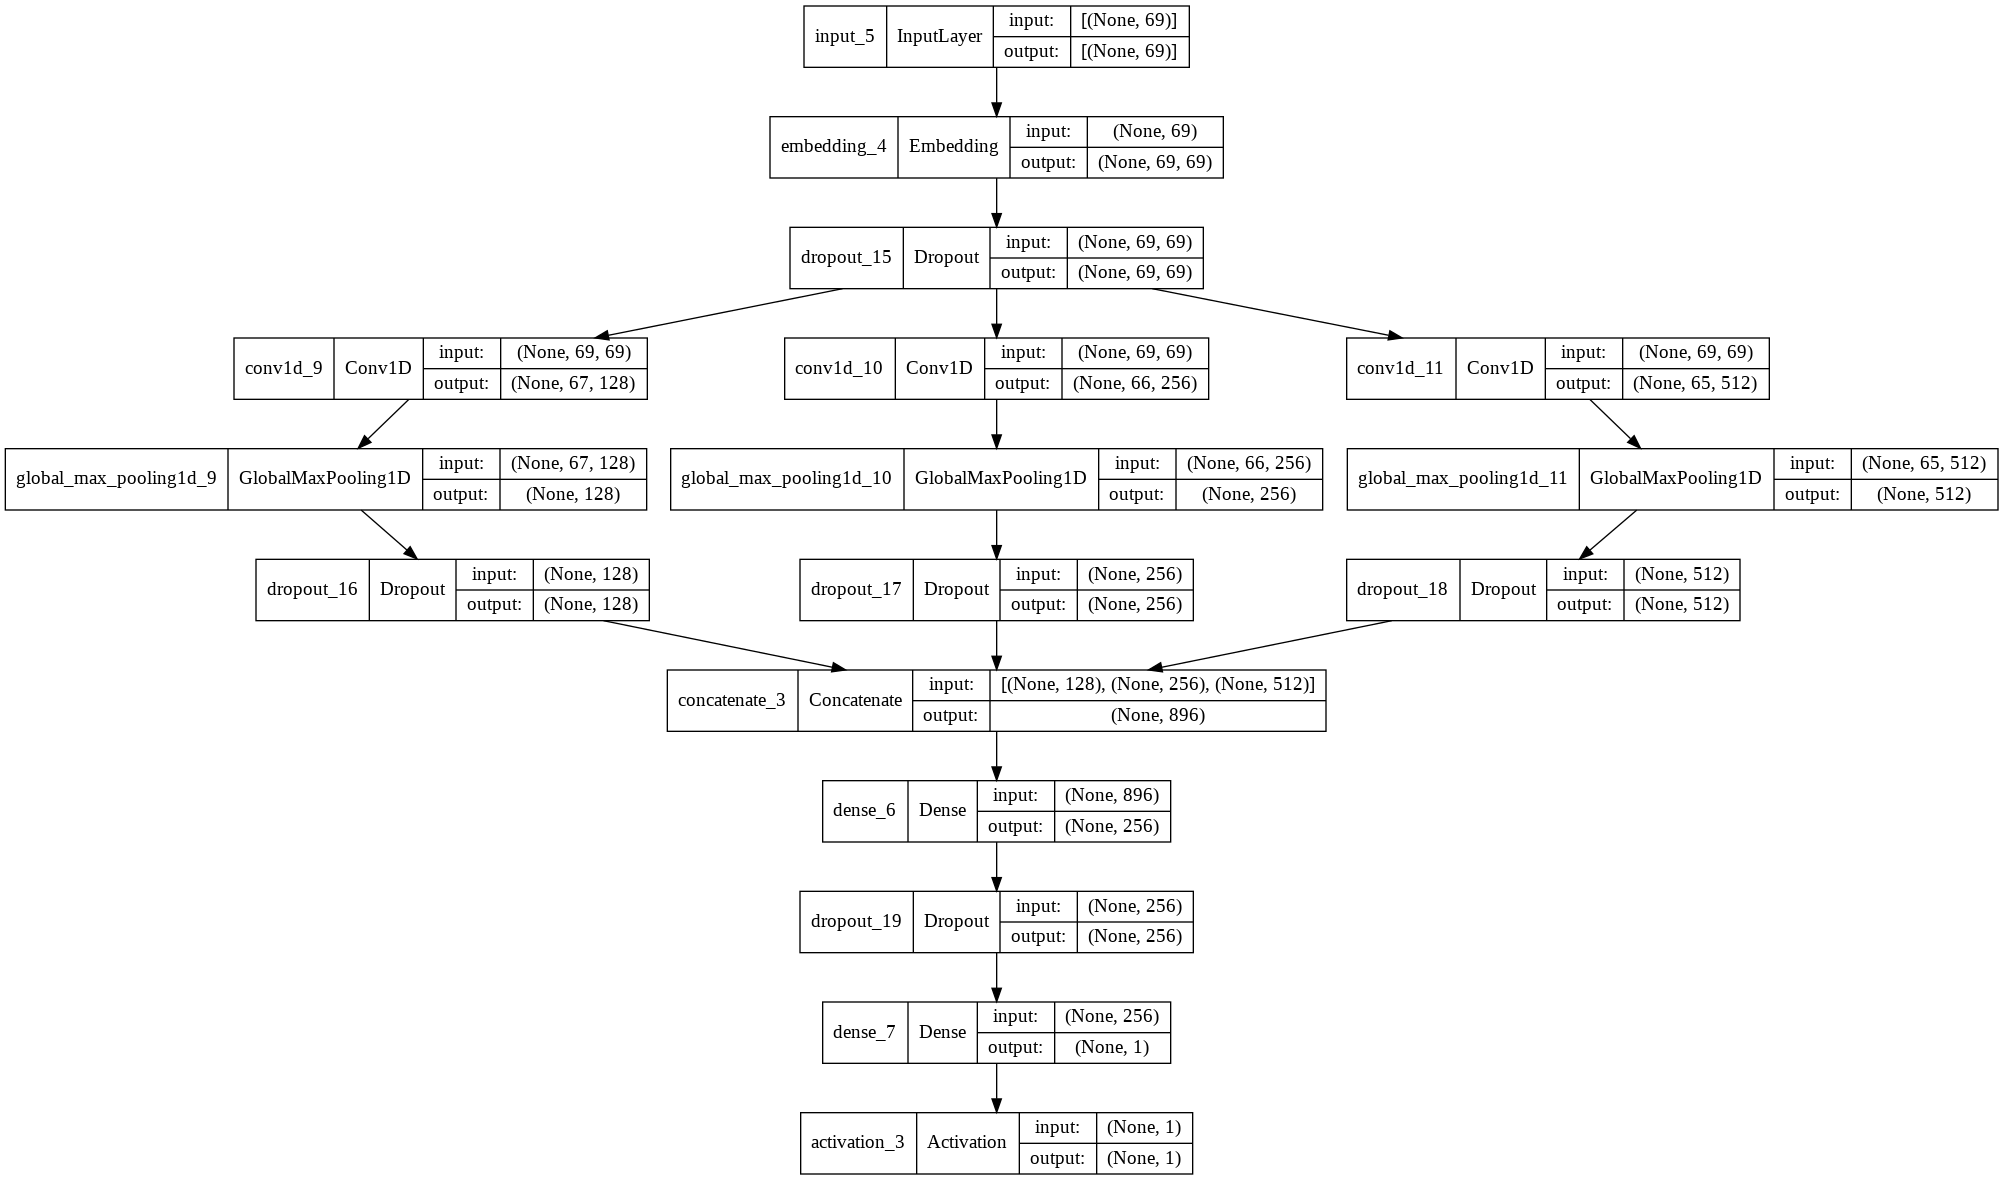

In [54]:
def create_cnn_model():
  
    input = Input(shape=(maxlen,), dtype='int32')
    
    
    encoder = Embedding(num_words, 69, weights=[X_train_padded], input_length=maxlen, trainable=True)(input)
        
    encoder = Dropout(0.5)(encoder)

    bigram_branch = Conv1D(filters=128, kernel_size=3, padding='valid', activation='relu', strides=1)(encoder)
    bigram_branch = GlobalMaxPooling1D()(bigram_branch)
    bigram_branch = Dropout(0.5)(bigram_branch)

    trigram_branch = Conv1D(filters=256, kernel_size=4, padding='valid', activation='relu', strides=1)(encoder)
    trigram_branch = GlobalMaxPooling1D()(trigram_branch)
    trigram_branch = Dropout(0.2)(trigram_branch)
    
    fourgram_branch = Conv1D(filters=512, kernel_size=5, padding='valid', activation='relu', strides=1)(encoder)
    fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
    fourgram_branch = Dropout(0.2)(fourgram_branch)
    
    merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)

    merged = Dense(256, activation='relu')(merged)
    merged = Dropout(0.5)(merged)
    
    merged = Dense(1)(merged)
    output = Activation('sigmoid')(merged)

    model = Model(inputs=[input], outputs=[output])
    adam = keras.optimizers.Adam(learning_rate=0.01) #1e-4
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    #model.summary()
    #plot_model(model,'MODEL.png',show_shapes=True)
    return model

cnn_model = create_cnn_model()
#cnn_model.fit(X_train_padded, Y_train_padded, epochs=2, batch_size=32, verbose=3)
#cnn_model.summary()
plot_model(cnn_model,'MODEL.png',show_shapes=True)

In [51]:
#history = cnn_model.fit(x=train_padded,y=Y_train,batch_size=32, epochs=4, verbose = 1,validation_split=0.2) 
history = cnn_model.fit(X_train_padded, Y_train, epochs=5, batch_size=32,verbose=1,validation_split=0.2)

Epoch 1/5
97/97 [==============================] - 12s 115ms/step - loss: 1.0533 - accuracy: 0.6318 - val_loss: 0.6578 - val_accuracy: 0.6567
Epoch 2/5
97/97 [==============================] - 11s 113ms/step - loss: 0.6568 - accuracy: 0.6412 - val_loss: 0.6446 - val_accuracy: 0.6567
Epoch 3/5
97/97 [==============================] - 11s 113ms/step - loss: 0.6519 - accuracy: 0.6418 - val_loss: 0.6469 - val_accuracy: 0.6567
Epoch 4/5
97/97 [==============================] - 11s 112ms/step - loss: 0.6523 - accuracy: 0.6461 - val_loss: 0.6436 - val_accuracy: 0.6567
Epoch 5/5
97/97 [==============================] - 11s 113ms/step - loss: 0.6539 - accuracy: 0.6441 - val_loss: 0.6443 - val_accuracy: 0.6567


In [61]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

'''p = cnn_model.predict(X_test,verbose=1)
predicted = [int(round(x[0])) for x in p]
predicted = np.array(predicted)
actual = ytest

tp = np.count_nonzero(predicted * actual)
tn = np.count_nonzero((predicted - 1) * (actual - 1))
fp = np.count_nonzero(predicted * (actual - 1))
fn = np.count_nonzero((predicted - 1) * actual)'''

accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fmeasure = (2 * precision * recall) / (precision + recall)
cohen_kappa_score = cohen_kappa_score(predicted, actual)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
auc_val = auc(false_positive_rate, true_positive_rate)
roc_auc_val = roc_auc_score(actual, predicted)

print('Accuracy\t' + str(accuracy))
print('Precision\t' + str(precision))
print('Recall\t' + str(recall))
print('f-measure\t' + str(fmeasure))
print('cohen_kappa_score\t' + str(cohen_kappa_score))
print('auc\t' + str(auc_val))
print('roc_auc\t' + str(roc_auc_val))

NameError: ignored

In [62]:
import matplotlib.pyplot as plt 

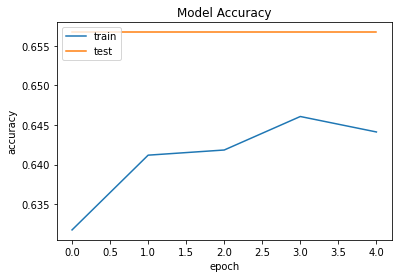

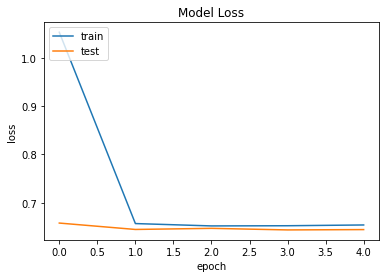

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()